# Accidental Gun Violence

This data set breaks down gun violence from a multitude of news sources: media, government, and commercial sources. Overall the data set differentiates the gun violence statistics by age, accidental, and mortality. My analysis of this data focuses specifically on accidental deaths, which includes location of incident, date, deaths, and injuries. With this information, I can break down trends over time and magnitude in specific states.


## Import Data
I used geopandas to import my CSV file "accidental_deaths" and applied the variable "accDeaths" inorder to easily call the data. I could have technically used pandas since "accidental_deaths" is not a shape file but I though I would geet in the habit of using geopandas.

In [55]:
import geopandas as gpd

In [56]:
accDeaths = gpd.read_file('accidental_deaths.csv')

## Data Type
I used type() to figure out what data type "accDeaths" is, in this case the varibal is a "geopandas.geodataframe.GeoDataFrame"

In [57]:
type(accDeaths)

geopandas.geodataframe.GeoDataFrame

## Commands
The next few operations consist of several commands to organize and perceive the data. The command .head() prints the first 5 lines in the data frame which start at line "0" through "4".

In [58]:
accDeaths.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,geometry
0,"November 26, 2016",Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,N/A,None
1,"November 26, 2016",Ohio,Grand Rapids,SR Route 65,1,0,N/A,None
2,"November 24, 2016",New York,Sandy Creek,Kehoe Road,1,0,N/A,None
3,"November 24, 2016",Florida,Black Point,N/A,1,0,N/A,None
4,"November 23, 2016",Michigan,Powell Township,North 1311 County Road KCI,1,0,N/A,None


The command .shape displays how many columns and rows there are in the given data frame. The output will print as (rows, columns), so in this particular instance there are 500 rows and 8 columns

In [59]:
accDeaths.shape

(500, 8)

The command .info breaks down the data types as defined by pandas (object, int64, float64) instead of native python which is (string, int, float).

In [60]:
accDeaths.info

<bound method DataFrame.info of          Incident Date     State   City Or County  \
0    November 26, 2016  Maryland    Sabillasville   
1    November 26, 2016      Ohio     Grand Rapids   
2    November 24, 2016  New York      Sandy Creek   
3    November 24, 2016   Florida      Black Point   
4    November 23, 2016  Michigan  Powell Township   
..                 ...       ...              ...   
495   October 18, 2015  Illinois        Effingham   
496   October 17, 2015      Ohio          Pandora   
497   October 17, 2015   Georgia           Dallas   
498   October 17, 2015  Illinois          Chicago   
499   October 17, 2015     Idaho         Meridian   

                                    Address # Killed # Injured Operations  \
0    6600 block of Eylers Valley Flint Road        1         0        N/A   
1                               SR Route 65        1         0        N/A   
2                                Kehoe Road        1         0        N/A   
3                      

Boxed parentheses will allow you to isolate one feature of the data frame into single columns. In this case I am isolating the state names.

In [14]:
accDeaths['State']

0      Maryland
1          Ohio
2      New York
3       Florida
4      Michigan
         ...   
495    Illinois
496        Ohio
497     Georgia
498    Illinois
499       Idaho
Name: State, Length: 500, dtype: object

##  More Details about the State Statistic 
In the line below I define the variable "stateCount" as a compilation of all the states and how many instances of each state there are.

In [64]:
stateCount = accDeaths['State'].value_counts()

Then I convert the series into a dataframe.

In [65]:
stateCount = stateCount.reset_index()

Then a rename the current columns list in the dataframe to a list that properly coincide with the numeric data. In this case ['index', 'State'] to ['state', 'count']

In [68]:
stateCount.columns.to_list()

['state', 'count']

In [67]:
stateCount.columns = ['state', 'count']
stateCount

,state,count
0,Texas,45
1,Florida,33
2,Georgia,27
3,Louisiana,25
4,Pennsylvania,22
5,Michigan,19
6,California,17
7,Illinois,16
8,South Carolina,16
9,Missouri,16


## Plotting the Data
Using the .plot function and the redefined stateCount variable, I plotted states on the X axis and instances of states on the y axis. This graph shows the number of accidental gun violence incidents in each state.

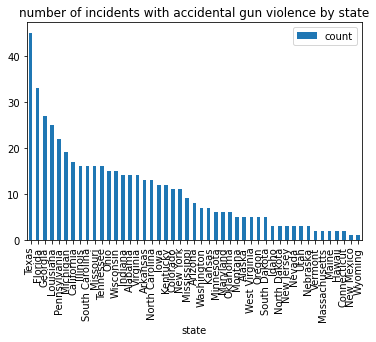

In [29]:
stateCount.plot.bar(x = 'state', y = 'count', title = 'number of incidents with accidental gun violence by state')

## Dates
For the next iterations I repeat the process above, in order to produce a line graph of incidents over time.

In [30]:
accDeaths['Incident Date']

0      November 26, 2016
1      November 26, 2016
2      November 24, 2016
3      November 24, 2016
4      November 23, 2016
             ...        
495     October 18, 2015
496     October 17, 2015
497     October 17, 2015
498     October 17, 2015
499     October 17, 2015
Name: Incident Date, Length: 500, dtype: object

In [31]:
dateCount = accDeaths['Incident Date'].value_counts()

In [32]:
dateCount = dateCount.reset_index()

In [33]:
dateCount.columns.to_list()

['index', 'Incident Date']

In [34]:
dateCount.columns = ['Incident Date', 'count']
dateCount

,Incident Date,count
0,"November 7, 2016",6
1,"February 6, 2016",5
2,"January 9, 2016",5
3,"July 15, 2016",5
4,"October 26, 2015",5
...,...,...
282,"June 20, 2016",1
283,"April 2, 2016",1
284,"October 1, 2016",1
285,"August 30, 2016",1


## Line Plot
This line plot works similarly to the bar grpah above, the x axis being the dates and the y axis being the number of incidents for each date.

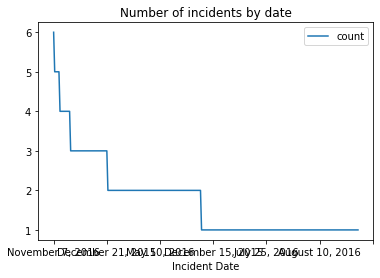

In [45]:
dateCount.plot(x = 'Incident Date', y = 'count', title = 'Number of incidents by date')

## Query
Query commands allows you to question the information in the data frame, in this case im searching the number of instances in which the string California appears. which is 17 times.

In [43]:
stateCount.query("state == 'California'")

,state,count
6,California,17
